In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,Age_Type,Food_Type,Food_Item,Amount_Taken,Allergy,Symptoms
0,Infant / Toddlers,Cereal grain and pulse,Barley,Small Amount,Gluten Allergy,Frequent Inflammation
1,Infant / Toddlers,Cereal grain and pulse,Barley,Large Amount,Gluten Allergy,Diarrhea with smelly stools
2,Infant / Toddlers,Cereal grain and pulse,Barley,Large Amount,Gluten Allergy,Vomiting
3,Infant / Toddlers,Cereal grain and pulse,Barley,Large Amount,Gluten Allergy,Abdominal distention
4,Children / Adolescents,Cereal grain and pulse,Barley,Small Amount,Gluten Allergy,Frequent Inflammation


# Exploratory Data Analysis(EDA)

In [4]:
df.shape

(666, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 6 columns):
Age_Type        666 non-null object
Food_Type       666 non-null object
Food_Item       666 non-null object
Amount_Taken    666 non-null object
Allergy         666 non-null object
Symptoms        666 non-null object
dtypes: object(6)
memory usage: 31.3+ KB


- No null values

In [6]:
df.describe()

,Age_Type,Food_Type,Food_Item,Amount_Taken,Allergy,Symptoms
count,666,666,666,666,666,666
unique,3,8,24,2,14,64
top,Adult,Nut and seed,Cabbage,Large Amount,Nut Allergy,Itchy skin and rash
freq,246,148,42,355,148,32


#### Age types

In [7]:
AGE_TYPE_LIST = df['Age_Type'].unique()
AGE_TYPE_LIST

array(['Infant / Toddlers', 'Children / Adolescents', 'Adult'],
      dtype=object)

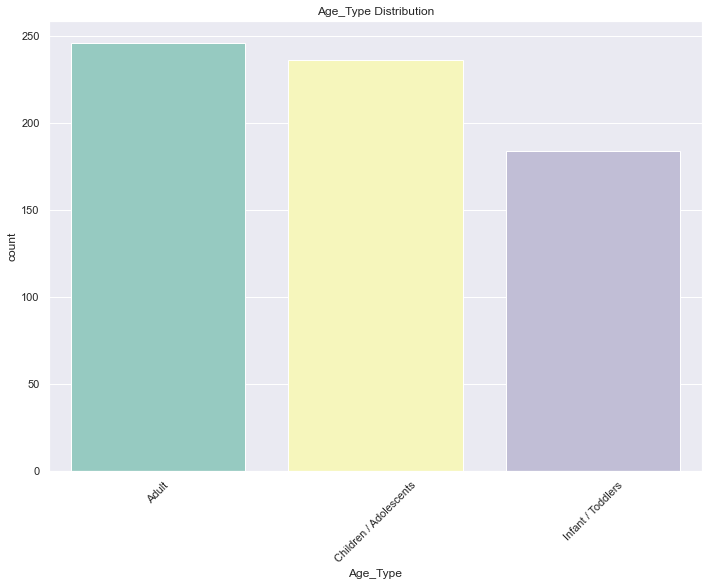

In [8]:
def plot_count(**kwargs):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_theme(style="darkgrid")
    ax = sns.countplot(
        x=kwargs['x'],  
        data=df,
        palette='Set3',
        order=df[kwargs['x']].value_counts().index # sort the data
    )
    ax.tick_params(axis='x', rotation=kwargs['rotation'])
    ax.set_title('{} Distribution'.format(kwargs['x']))
    plt.show()

    
plot_count(x='Age_Type', rotation=45)

#### Food Type

In [9]:
FOOD_TYPE_LIST = df['Food_Type'].unique()
FOOD_TYPE_LIST

array(['Cereal grain and pulse', 'Dairy', 'Fruit', 'Citrus Fruit',
       'Nut and seed', 'Poultry', 'SeaFood', 'Vegetable'], dtype=object)

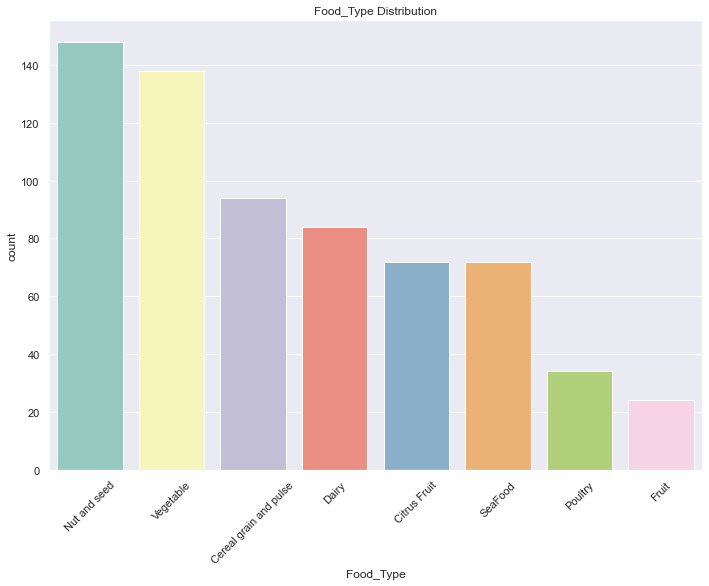

In [10]:
plot_count(x='Food_Type', rotation=45)

- Dataset contains less records on Fruit allergies

#### Food Item

In [11]:
FOOD_ITEM_LIST = df['Food_Item'].unique()
FOOD_ITEM_LIST

array(['Barley', 'Beans', 'Corn', 'Corn Products', 'Butter', 'Milk',
       'Buttermilk', 'Cheese', 'Apple', 'Banana', 'Oranges', 'Limes',
       'Lemons', 'Almond', 'Peanut', 'Cashews', 'Pistachios', 'Eggs',
       'Fish', 'Shellfish', 'Mushroom', 'Cabbage', 'Garlic', 'Onion'],
      dtype=object)

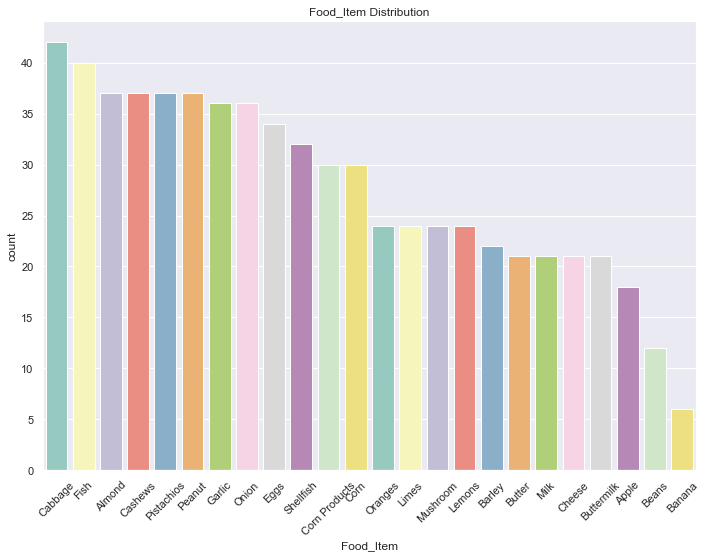

In [12]:
plot_count(x='Food_Item', rotation=45)

#### Amount Taken

In [13]:
AMOUNT_TAKEN_LIST = df['Amount_Taken'].unique()
AMOUNT_TAKEN_LIST

array(['Small Amount', 'Large Amount'], dtype=object)

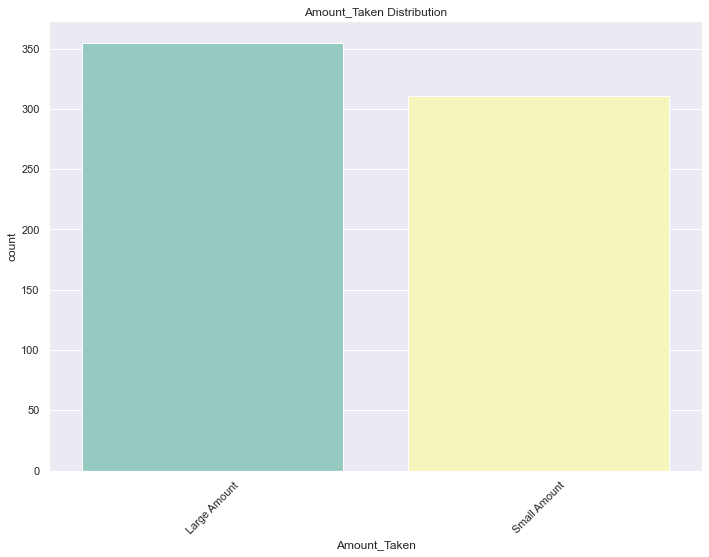

In [14]:
plot_count(x='Amount_Taken', rotation=45)

#### Allergy

In [15]:
ALLERGY_LIST = df['Allergy'].unique()
ALLERGY_LIST

array(['Gluten Allergy', 'Legume Allergy', 'Corn Allergy',
       'Milk allergy / Lactose intolerance', 'Oral Allergy Syndrome',
       'Banana Allergy', 'Citrus Allergy', 'Nut Allergy',
       'Poultry Allergy', 'Histamine Allergy', 'Shellfish Allergy',
       'Mushroom Allergy', 'Cabbage Allergy', 'Allium Allergy'],
      dtype=object)

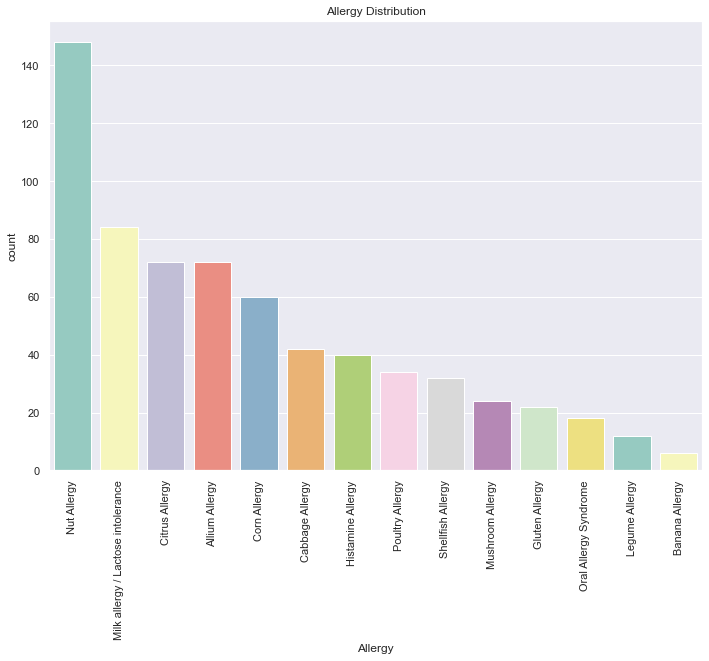

In [16]:
plot_count(x='Allergy', rotation=90)

#### Symptoms

In [17]:
SYMPTOM_LIST = df['Symptoms'].unique()
SYMPTOM_LIST

array(['Frequent Inflammation', 'Diarrhea with smelly stools', 'Vomiting',
       'Abdominal distention', 'Inflammation in the small intestine',
       'Frequent diarrhea / Constipation', 'Fatigue ',
       'Blistering skin condition', 'Leg or arm numbness',
       'Eye irritation', 'Canker sores inside the mouth',
       'Swelling in the face', 'Nausea and vomiting',
       'Runny or stuffed nose', 'Loss of consciousness',
       'Rapid and irregular pulse', 'Itchiness in the mouth', 'Dizziness',
       'Wheezing', 'Tingling feeling around the lips or mouth',
       'Loose stools or diarrhea', 'Coughing or shortness of breath',
       'Slight swelling and bumpiness of the mouth, throat, or lips',
       'Difficulty swallowing or breathing',
       'Itching and tingling of the mouth, throat, and sometimes lips',
       'Swelling of the skin - angioedema', 'Narrowing of the throat',
       'Extreme itching', 'Dry, scaly, flaky skin',
       'Swelling and Blisters', 'skin redness and ski

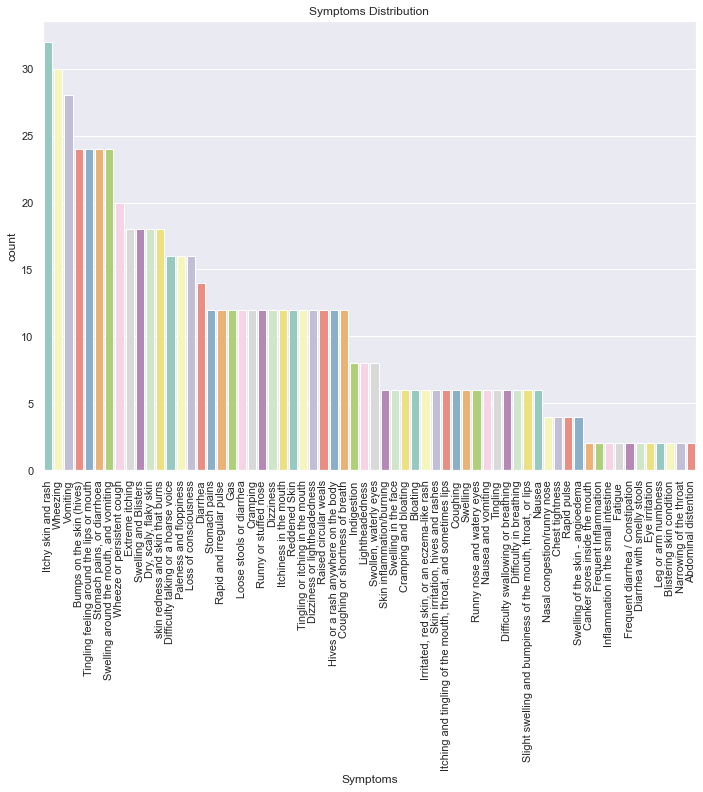

In [18]:
plot_count(x='Symptoms', rotation=90)

# Data Preprocessing

#### Symptoms in to list

In [19]:
reapeating_list = ['Allergy', 'Age_Type', 'Food_Type', 'Food_Item', 'Amount_Taken']
df = (df.groupby(reapeating_list).agg({'Symptoms': lambda x: x.dropna().tolist()})).reset_index() 

In [20]:
df.head()

,Allergy,Age_Type,Food_Type,Food_Item,Amount_Taken,Symptoms
0,Allium Allergy,Adult,Vegetable,Garlic,Large Amount,"[Hives or a rash anywhere on the body, Tinglin..."
1,Allium Allergy,Adult,Vegetable,Garlic,Small Amount,"[Hives or a rash anywhere on the body, Tinglin..."
2,Allium Allergy,Adult,Vegetable,Onion,Large Amount,"[Hives or a rash anywhere on the body, Tinglin..."
3,Allium Allergy,Adult,Vegetable,Onion,Small Amount,"[Hives or a rash anywhere on the body, Tinglin..."
4,Allium Allergy,Children / Adolescents,Vegetable,Garlic,Large Amount,"[Hives or a rash anywhere on the body, Tinglin..."


In [21]:
df.shape

(142, 6)

- Now dataset has 142 records and 6 columns

In [22]:
df.to_csv('new_dataset.csv', index=False)

# Loading New Dataset

In [23]:
df = pd.read_csv('new_dataset.csv')

In [24]:
df.head()

,Allergy,Age_Type,Food_Type,Food_Item,Amount_Taken,Symptoms
0,Allium Allergy,Adult,Vegetable,Garlic,Large Amount,"['Hives or a rash anywhere on the body', 'Ting..."
1,Allium Allergy,Adult,Vegetable,Garlic,Small Amount,"['Hives or a rash anywhere on the body', 'Ting..."
2,Allium Allergy,Adult,Vegetable,Onion,Large Amount,"['Hives or a rash anywhere on the body', 'Ting..."
3,Allium Allergy,Adult,Vegetable,Onion,Small Amount,"['Hives or a rash anywhere on the body', 'Ting..."
4,Allium Allergy,Children / Adolescents,Vegetable,Garlic,Large Amount,"['Hives or a rash anywhere on the body', 'Ting..."


**Create seperate columns for each symptom**

In [25]:
def new_symptom_cols(row, col_name):
    if col_name in row['Symptoms']:
        return 1
    return 0
for symptom in SYMPTOM_LIST:
    df[symptom] = df.apply(lambda x: new_symptom_cols(x, symptom), axis=1)

In [26]:
df.drop('Symptoms', axis=1, inplace=True)

In [27]:
df.head()

,Allergy,Age_Type,Food_Type,Food_Item,Amount_Taken,Frequent Inflammation,Diarrhea with smelly stools,Vomiting,Abdominal distention,Inflammation in the small intestine,...,Swelling,Tingling,Nausea,Coughing,Hives or a rash anywhere on the body,Tingling or itching in the mouth,Stomach pains,Cramping,Gas,Dizziness or lightheadedness
0,Allium Allergy,Adult,Vegetable,Garlic,Large Amount,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,1
1,Allium Allergy,Adult,Vegetable,Garlic,Small Amount,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,1
2,Allium Allergy,Adult,Vegetable,Onion,Large Amount,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,1
3,Allium Allergy,Adult,Vegetable,Onion,Small Amount,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,1
4,Allium Allergy,Children / Adolescents,Vegetable,Garlic,Large Amount,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,1


# 1. Selecting Columns For Allergy Predictions

In [28]:
x = df.drop(['Allergy', 'Food_Type', 'Food_Item'], axis = 1)
x_cpy = x.copy()
y = df[['Allergy']]

# Encoding

In [29]:
from sklearn import preprocessing


ordinal_encoder_x = preprocessing.OrdinalEncoder()
ordinal_encoder_y= preprocessing.OrdinalEncoder()

trained_oe_x = ordinal_encoder_x.fit(x)
trained_oe_y = ordinal_encoder_y.fit(y)

In [30]:
x = trained_oe_x.transform(x)
y = trained_oe_y.transform(y)

In [31]:
trained_oe_x.categories_

[array(['Adult', 'Children / Adolescents', 'Infant / Toddlers'],
       dtype=object),
 array(['Large Amount', 'Small Amount'], dtype=object),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], d

In [32]:
ALLERGIES_CLASSES = trained_oe_y.categories_[0]
ALLERGIES_CLASSES

array(['Allium Allergy', 'Banana Allergy', 'Cabbage Allergy',
       'Citrus Allergy', 'Corn Allergy', 'Gluten Allergy',
       'Histamine Allergy', 'Legume Allergy',
       'Milk allergy / Lactose intolerance', 'Mushroom Allergy',
       'Nut Allergy', 'Oral Allergy Syndrome', 'Poultry Allergy',
       'Shellfish Allergy'], dtype=object)

# Train Test Split

In [33]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

# Model Selection

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [35]:
# classifier list
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    GaussianNB()
]

LogisticRegression
	 Cross Validation Score: 0.9580952380952381%
                                    precision    recall  f1-score   support

                    Allium Allergy       1.00      1.00      1.00         4
                    Banana Allergy       0.67      1.00      0.80         2
                   Cabbage Allergy       1.00      1.00      1.00         2
                    Citrus Allergy       1.00      1.00      1.00         5
                      Corn Allergy       1.00      1.00      1.00         3
                    Gluten Allergy       0.00      0.00      0.00         2
                 Histamine Allergy       0.50      1.00      0.67         2
                    Legume Allergy       1.00      1.00      1.00         2
Milk allergy / Lactose intolerance       1.00      1.00      1.00         7
                  Mushroom Allergy       1.00      1.00      1.00         2
                       Nut Allergy       1.00      1.00      1.00         7
             Oral Alle

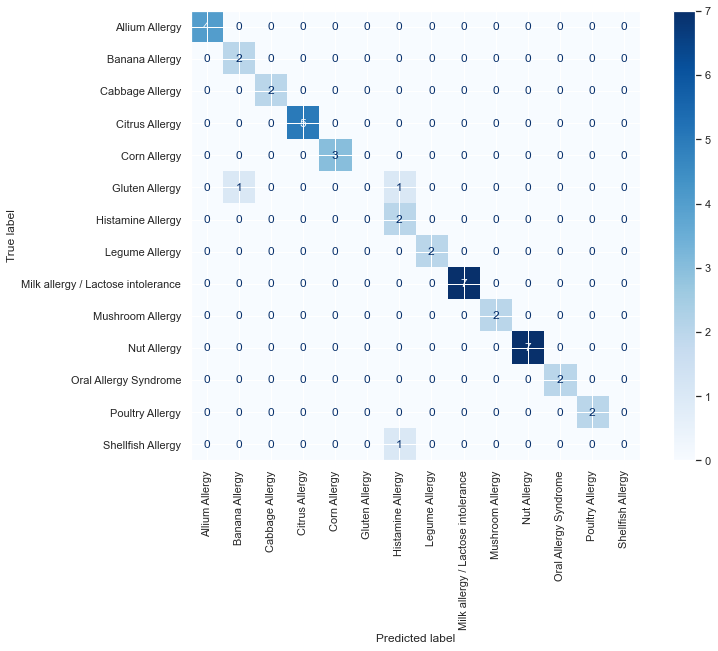

KNeighborsClassifier
	 Cross Validation Score: 0.900952380952381%
                                    precision    recall  f1-score   support

                    Allium Allergy       1.00      1.00      1.00         4
                    Banana Allergy       0.67      1.00      0.80         2
                   Cabbage Allergy       1.00      1.00      1.00         2
                    Citrus Allergy       1.00      1.00      1.00         5
                      Corn Allergy       1.00      1.00      1.00         3
                    Gluten Allergy       0.50      0.50      0.50         2
                 Histamine Allergy       1.00      0.50      0.67         2
                    Legume Allergy       1.00      1.00      1.00         2
Milk allergy / Lactose intolerance       1.00      1.00      1.00         7
                  Mushroom Allergy       1.00      1.00      1.00         2
                       Nut Allergy       1.00      1.00      1.00         7
             Oral All

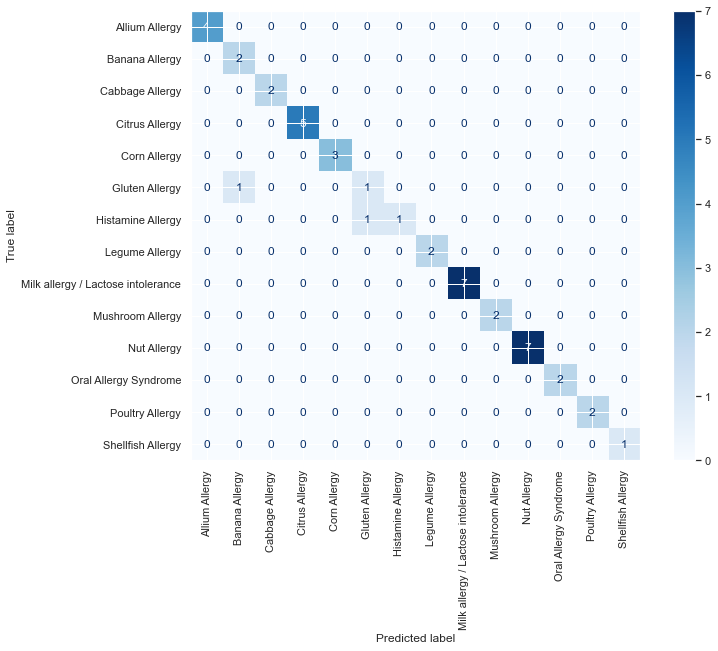

RandomForestClassifier
	 Cross Validation Score: 0.9580952380952381%
                                    precision    recall  f1-score   support

                    Allium Allergy       1.00      1.00      1.00         4
                    Banana Allergy       0.50      1.00      0.67         2
                   Cabbage Allergy       1.00      1.00      1.00         2
                    Citrus Allergy       1.00      1.00      1.00         5
                      Corn Allergy       1.00      1.00      1.00         3
                    Gluten Allergy       0.00      0.00      0.00         2
                 Histamine Allergy       0.50      0.50      0.50         2
                    Legume Allergy       1.00      1.00      1.00         2
Milk allergy / Lactose intolerance       1.00      1.00      1.00         7
                  Mushroom Allergy       1.00      1.00      1.00         2
                       Nut Allergy       1.00      1.00      1.00         7
             Oral 

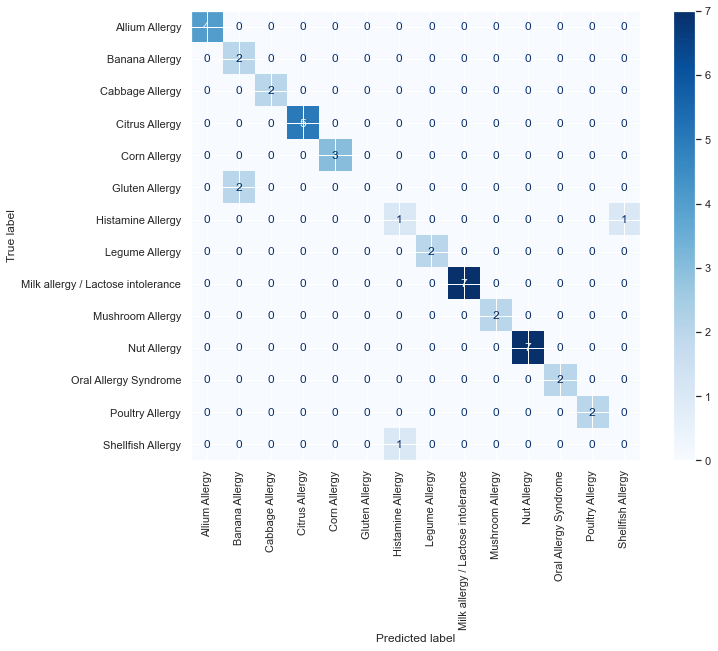

DecisionTreeClassifier
	 Cross Validation Score: 0.9580952380952381%
                                    precision    recall  f1-score   support

                    Allium Allergy       1.00      1.00      1.00         4
                    Banana Allergy       1.00      1.00      1.00         2
                   Cabbage Allergy       1.00      1.00      1.00         2
                    Citrus Allergy       1.00      1.00      1.00         5
                      Corn Allergy       1.00      1.00      1.00         3
                    Gluten Allergy       1.00      1.00      1.00         2
                 Histamine Allergy       0.50      0.50      0.50         2
                    Legume Allergy       1.00      1.00      1.00         2
Milk allergy / Lactose intolerance       1.00      1.00      1.00         7
                  Mushroom Allergy       1.00      1.00      1.00         2
                       Nut Allergy       1.00      1.00      1.00         7
             Oral 

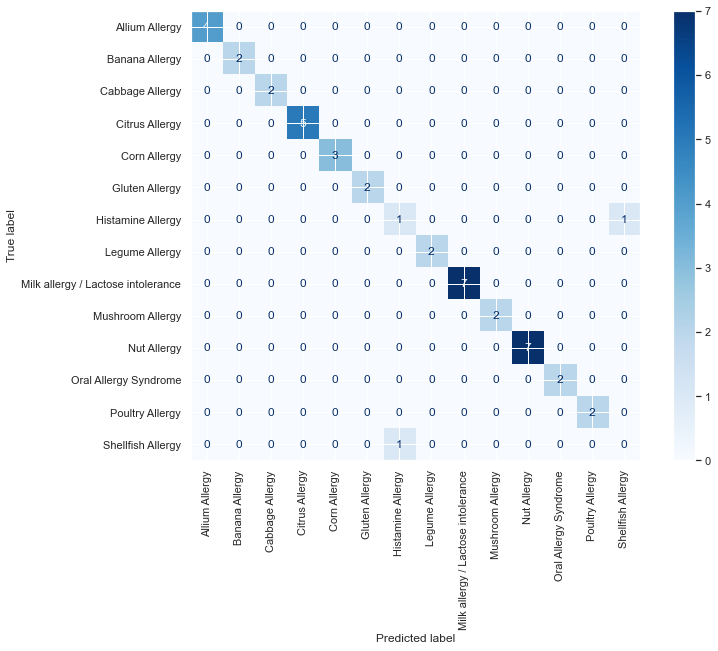

GaussianNB
	 Cross Validation Score: 0.9723809523809525%
                                    precision    recall  f1-score   support

                    Allium Allergy       1.00      1.00      1.00         4
                    Banana Allergy       0.50      1.00      0.67         2
                   Cabbage Allergy       1.00      1.00      1.00         2
                    Citrus Allergy       1.00      1.00      1.00         5
                      Corn Allergy       1.00      1.00      1.00         3
                    Gluten Allergy       0.00      0.00      0.00         2
                 Histamine Allergy       1.00      0.50      0.67         2
                    Legume Allergy       1.00      1.00      1.00         2
Milk allergy / Lactose intolerance       1.00      1.00      1.00         7
                  Mushroom Allergy       1.00      1.00      1.00         2
                       Nut Allergy       1.00      1.00      1.00         7
             Oral Allergy Synd

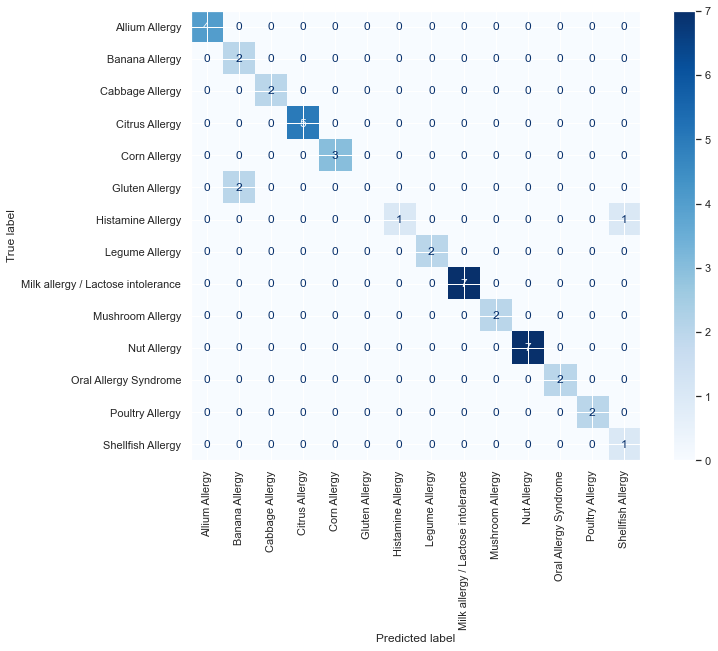

In [36]:
import warnings
warnings.filterwarnings('ignore')

for cls in classifiers:
    model = cls.fit(x_train, np.ravel(y_train))
    y_pred = model.predict(x_test)
    
    cv_scores = cross_val_score(cls, x, np.ravel(y), cv=10)
    cv_score = sum(cv_scores)/len(cv_scores)
    
    print('======================================\n{}\n\t Cross Validation Score: {}%\n======================================'.format(cls.__class__.__name__, cv_score))
    print(classification_report(y_test, y_pred, target_names=ALLERGIES_CLASSES)) #classification report from sklearn
    
    plot_confusion_matrix(
        cls,
        x_test,
        np.ravel(y_test),
        display_labels=ALLERGIES_CLASSES,
        xticks_rotation=90,
        cmap=plt.cm.Blues
    )
    plt.show()


- **F1-Score**: A good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms. An F1 score is considered perfect when it's 1
- **Precision**: should ideally be 1 (high) for a good classifier
- **Recall**:  should ideally be 1 (high) for a good classifier

**LogisticRegression**
- Cross Validation Score: 0.9580952380952381%

**KNeighborsClassifier**
- Cross Validation Score: 0.900952380952381%

**RandomForestClassifier**
- Cross Validation Score: 0.9580952380952381%

**DecisionTreeClassifier**
- Cross Validation Score: 0.9580952380952381%

**GaussianNB**
- Cross Validation Score: 0.9723809523809525%
     
> According to the evaluation **LogisticRegression**, **RandomForest**, and **GaussianNB** classifiers performed well. So, **GaussianNB** was choosen for final model.

## Hyper Parameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

gs = GridSearchCV(estimator=gnb, 
                 param_grid=param_grid, 
                 cv=10,
                 verbose=1, 
                 scoring='accuracy',
                 n_jobs=-1)

gs.fit(x, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [38]:
print(gs.best_score_)
print(gs.best_params_)

0.9723809523809525
{'var_smoothing': 0.0657933224657568}


### Model Creation

In [39]:
def create_classifier(**kwargs):
    gnb = GaussianNB(var_smoothing=kwargs['var_smoothing'])
    
    return gnb

In [40]:
classifier = create_classifier(**gs.best_params_)
classifier.fit(x, y)

GaussianNB(var_smoothing=0.0657933224657568)

### Save Model

In [41]:
import pickle

file_name = './saved_models/allergy_classifier.sav'

with open(file_name, 'wb') as f:
    pickle.dump(classifier, f)


# 2. Selecting Columns For Food Type Predictions

In [42]:
x = df.drop(['Food_Type', 'Food_Item'], axis = 1)
x_cpy = x.copy()
y = df[['Food_Type']]

In [43]:
x.head()

,Allergy,Age_Type,Amount_Taken,Frequent Inflammation,Diarrhea with smelly stools,Vomiting,Abdominal distention,Inflammation in the small intestine,Frequent diarrhea / Constipation,Fatigue,...,Swelling,Tingling,Nausea,Coughing,Hives or a rash anywhere on the body,Tingling or itching in the mouth,Stomach pains,Cramping,Gas,Dizziness or lightheadedness
0,Allium Allergy,Adult,Large Amount,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,1
1,Allium Allergy,Adult,Small Amount,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,1
2,Allium Allergy,Adult,Large Amount,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,1
3,Allium Allergy,Adult,Small Amount,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,1
4,Allium Allergy,Children / Adolescents,Large Amount,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,1


In [44]:
y.head()

,Food_Type
0,Vegetable
1,Vegetable
2,Vegetable
3,Vegetable
4,Vegetable


## Encoding

In [45]:
ordinal_encoder_x_food_type = preprocessing.OrdinalEncoder()
ordinal_encoder_y_food_type = preprocessing.OrdinalEncoder()

trained_oe_x_food_type = ordinal_encoder_x_food_type.fit(x)
trained_oe_y_food_type = ordinal_encoder_y_food_type.fit(y)

In [46]:
x = ordinal_encoder_x_food_type.transform(x)
y = ordinal_encoder_y_food_type.transform(y)

In [47]:
ordinal_encoder_x_food_type.categories_

[array(['Allium Allergy', 'Banana Allergy', 'Cabbage Allergy',
        'Citrus Allergy', 'Corn Allergy', 'Gluten Allergy',
        'Histamine Allergy', 'Legume Allergy',
        'Milk allergy / Lactose intolerance', 'Mushroom Allergy',
        'Nut Allergy', 'Oral Allergy Syndrome', 'Poultry Allergy',
        'Shellfish Allergy'], dtype=object),
 array(['Adult', 'Children / Adolescents', 'Infant / Toddlers'],
       dtype=object),
 array(['Large Amount', 'Small Amount'], dtype=object),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], d

In [48]:
FOOD_TYPE_CLASSES = ordinal_encoder_y_food_type.categories_[0]
FOOD_TYPE_CLASSES

array(['Cereal grain and pulse', 'Citrus Fruit', 'Dairy', 'Fruit',
       'Nut and seed', 'Poultry', 'SeaFood', 'Vegetable'], dtype=object)

# Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

# Model Selection

In [50]:
# classifier list
classifiers_f_i = [
    LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    GaussianNB()
]

LogisticRegression
	 Cross Validation Score: 0.9433497536945813%
                        precision    recall  f1-score   support

Cereal grain and pulse       1.00      1.00      1.00         7
          Citrus Fruit       1.00      1.00      1.00         6
                 Dairy       1.00      1.00      1.00         7
                 Fruit       1.00      1.00      1.00         4
          Nut and seed       1.00      1.00      1.00         7
               Poultry       1.00      1.00      1.00         2
               SeaFood       1.00      1.00      1.00         3
             Vegetable       1.00      1.00      1.00         7

              accuracy                           1.00        43
             macro avg       1.00      1.00      1.00        43
          weighted avg       1.00      1.00      1.00        43



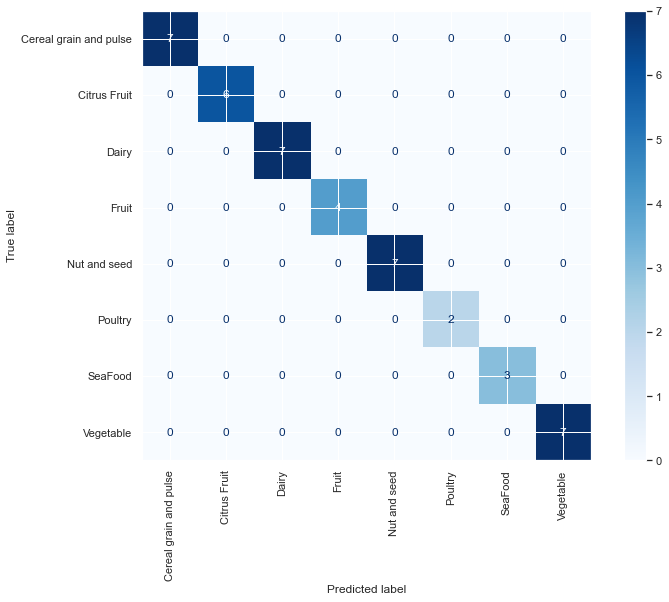

KNeighborsClassifier
	 Cross Validation Score: 0.8857142857142858%
                        precision    recall  f1-score   support

Cereal grain and pulse       1.00      1.00      1.00         7
          Citrus Fruit       1.00      1.00      1.00         6
                 Dairy       1.00      1.00      1.00         7
                 Fruit       0.80      1.00      0.89         4
          Nut and seed       1.00      1.00      1.00         7
               Poultry       0.67      1.00      0.80         2
               SeaFood       1.00      0.33      0.50         3
             Vegetable       1.00      1.00      1.00         7

              accuracy                           0.95        43
             macro avg       0.93      0.92      0.90        43
          weighted avg       0.97      0.95      0.95        43



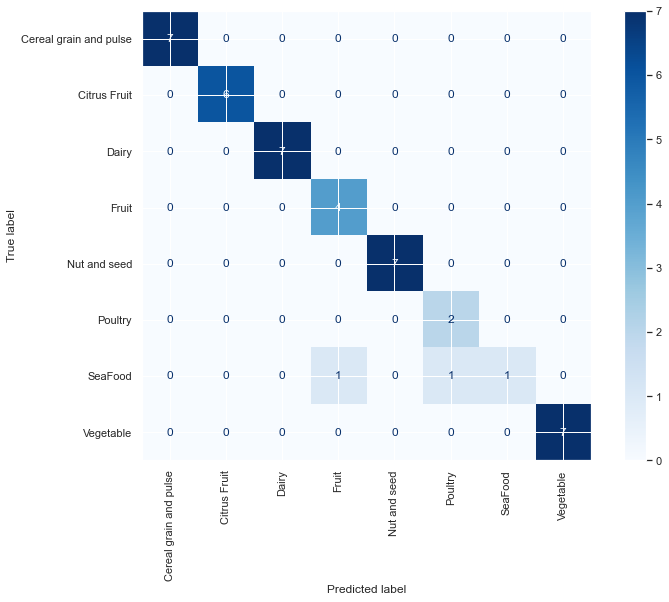

RandomForestClassifier
	 Cross Validation Score: 0.9576354679802955%
                        precision    recall  f1-score   support

Cereal grain and pulse       1.00      1.00      1.00         7
          Citrus Fruit       1.00      1.00      1.00         6
                 Dairy       1.00      1.00      1.00         7
                 Fruit       1.00      1.00      1.00         4
          Nut and seed       1.00      1.00      1.00         7
               Poultry       1.00      1.00      1.00         2
               SeaFood       1.00      1.00      1.00         3
             Vegetable       1.00      1.00      1.00         7

              accuracy                           1.00        43
             macro avg       1.00      1.00      1.00        43
          weighted avg       1.00      1.00      1.00        43



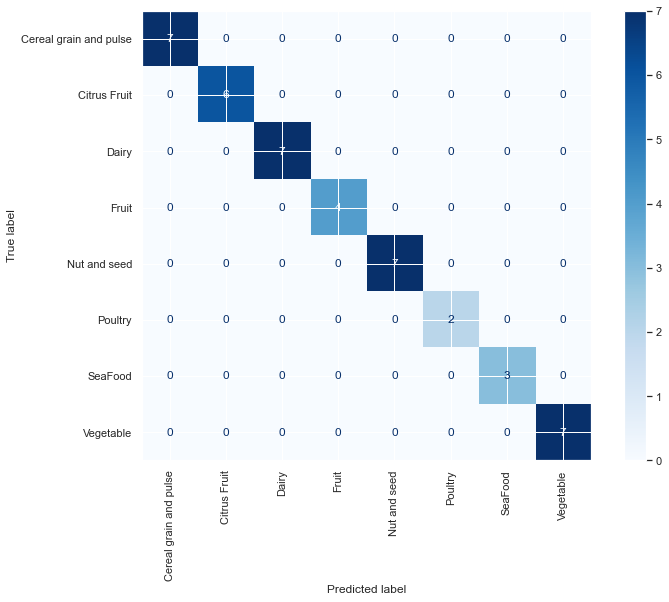

DecisionTreeClassifier
	 Cross Validation Score: 0.9719211822660098%
                        precision    recall  f1-score   support

Cereal grain and pulse       1.00      1.00      1.00         7
          Citrus Fruit       1.00      1.00      1.00         6
                 Dairy       1.00      1.00      1.00         7
                 Fruit       1.00      1.00      1.00         4
          Nut and seed       1.00      1.00      1.00         7
               Poultry       1.00      1.00      1.00         2
               SeaFood       1.00      1.00      1.00         3
             Vegetable       1.00      1.00      1.00         7

              accuracy                           1.00        43
             macro avg       1.00      1.00      1.00        43
          weighted avg       1.00      1.00      1.00        43



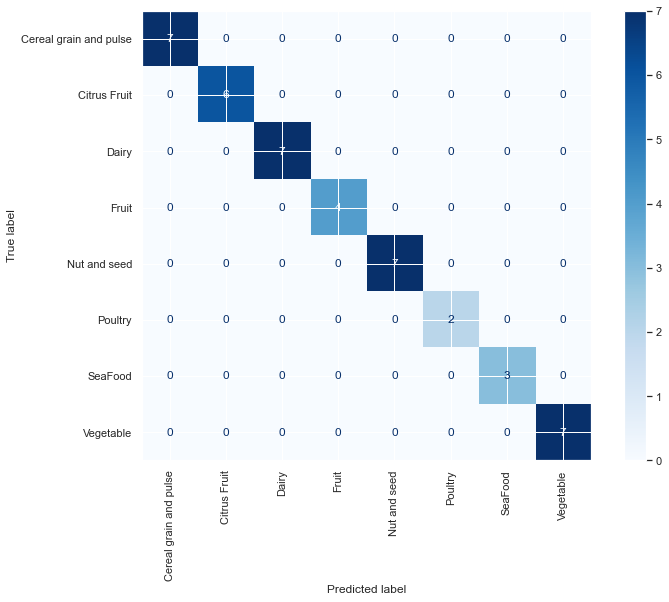

GaussianNB
	 Cross Validation Score: 0.9571428571428571%
                        precision    recall  f1-score   support

Cereal grain and pulse       1.00      1.00      1.00         7
          Citrus Fruit       1.00      1.00      1.00         6
                 Dairy       1.00      1.00      1.00         7
                 Fruit       1.00      1.00      1.00         4
          Nut and seed       1.00      1.00      1.00         7
               Poultry       1.00      1.00      1.00         2
               SeaFood       1.00      1.00      1.00         3
             Vegetable       1.00      1.00      1.00         7

              accuracy                           1.00        43
             macro avg       1.00      1.00      1.00        43
          weighted avg       1.00      1.00      1.00        43



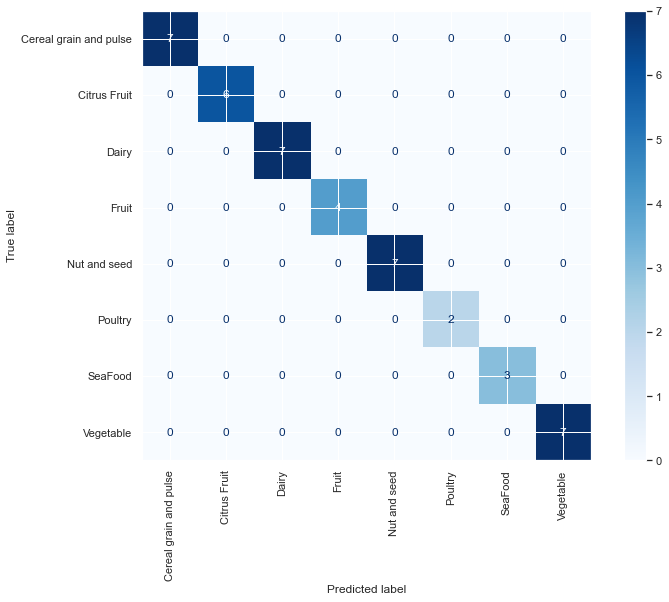

In [51]:
import warnings
warnings.filterwarnings('ignore')

for cls in classifiers_f_i:
    model = cls.fit(x_train, np.ravel(y_train))
    y_pred = model.predict(x_test)
    
    cv_scores = cross_val_score(cls, x, np.ravel(y), cv=5)
    cv_score = sum(cv_scores)/len(cv_scores)
    
    print('======================================\n{}\n\t Cross Validation Score: {}%\n======================================'.format(cls.__class__.__name__, cv_score))
    print(classification_report(y_test, y_pred, target_names=FOOD_TYPE_CLASSES)) #classification report from sklearn
    
    plot_confusion_matrix(
        cls,
        x_test,
        np.ravel(y_test),
        display_labels=FOOD_TYPE_CLASSES,
        xticks_rotation=90,
        cmap=plt.cm.Blues
    )
    plt.show()


**LogisticRegression**
- Cross Validation Score: 0.9433497536945813%

**KNeighborsClassifier**
- Cross Validation Score: 0.8857142857142858%

**RandomForestClassifier**
- Cross Validation Score: 0.9719211822660098%

**DecisionTreeClassifier**
- Cross Validation Score: 0.9857142857142858%

**GaussianNB**
- Cross Validation Score: 0.9571428571428571%
     
> According to the evaluation **Tree-Based Classifiers** performed well. So, **DecisionTreeClassifier** was choosen for final model.

## Hyper Parameter Tuning

In [52]:
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()

param_grid = {
    "splitter":["best","random"],
    "max_depth" : [1,3,5,7,9,11,12],
    "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
    "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    "max_features":["auto","log2","sqrt",None],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] 
}

gs = GridSearchCV(estimator=dtc, 
                 param_grid=param_grid, 
                 cv=10,
                 verbose=1, 
                 scoring='accuracy',
                 n_jobs=-1)

gs.fit(x, y)

Fitting 10 folds for each of 50400 candidates, totalling 504000 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [53]:
print(gs.best_score_)
print(gs.best_params_)

0.7795238095238096
{'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 90, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.1, 'splitter': 'random'}


In [54]:
def create_classifier(**kwargs):
    dtc = DecisionTreeClassifier(**kwargs)
    
    return dtc

In [55]:
classifier = create_classifier(**gs.best_params_)
classifier.fit(x, y)

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=90, min_samples_leaf=4,
                       min_weight_fraction_leaf=0.1, splitter='random')

### Save Model

In [56]:
import pickle

file_name = './saved_models/food_type_classifier.sav'

with open(file_name, 'wb') as f:
    pickle.dump(classifier, f)


# Real Word Test 

> - x => ('Age_Type', 'Amount_Taken', 'Symptom_1', 'Symptom_2', ...)

In [57]:
# ['Allium Allergy', 'Adult', 'Vegetable', 'Garlic', 'Large Amount',
#         "['Hives or a rash anywhere on the body', 'Tingling or itching in the mouth', 'Stomach pains', 'Cramping', 'Gas', 'Dizziness or lightheadedness']"]

age_type = 'Adult'
amount_taken = 'Large Amount'
symptoms = ['Hives or a rash anywhere on the body', 'Tingling or itching in the mouth', 'Stomach pains', 'Cramping', 'Gas', 'Dizziness or lightheadedness']

In [58]:
input_df = pd.DataFrame(data=None, columns=df.columns, index=df.index).dropna()

In [59]:
input_df.head()

,Allergy,Age_Type,Food_Type,Food_Item,Amount_Taken,Frequent Inflammation,Diarrhea with smelly stools,Vomiting,Abdominal distention,Inflammation in the small intestine,...,Swelling,Tingling,Nausea,Coughing,Hives or a rash anywhere on the body,Tingling or itching in the mouth,Stomach pains,Cramping,Gas,Dizziness or lightheadedness


In [60]:
input_df.drop(['Allergy', 'Food_Type', 'Food_Item'], axis=1, inplace=True)

In [61]:
# insert data into dataframe
data = [0 for i in range(input_df.shape[1])]
data[0] = age_type
data[1] = amount_taken

In [62]:
input_df = input_df.append(
    pd.DataFrame([data], columns=input_df.columns)
)

In [63]:
input_df.head()

,Age_Type,Amount_Taken,Frequent Inflammation,Diarrhea with smelly stools,Vomiting,Abdominal distention,Inflammation in the small intestine,Frequent diarrhea / Constipation,Fatigue,Blistering skin condition,...,Swelling,Tingling,Nausea,Coughing,Hives or a rash anywhere on the body,Tingling or itching in the mouth,Stomach pains,Cramping,Gas,Dizziness or lightheadedness
0,Adult,Large Amount,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
for symptom in symptoms:
    input_df[symptom] = 1

In [65]:
input_df.head()

,Age_Type,Amount_Taken,Frequent Inflammation,Diarrhea with smelly stools,Vomiting,Abdominal distention,Inflammation in the small intestine,Frequent diarrhea / Constipation,Fatigue,Blistering skin condition,...,Swelling,Tingling,Nausea,Coughing,Hives or a rash anywhere on the body,Tingling or itching in the mouth,Stomach pains,Cramping,Gas,Dizziness or lightheadedness
0,Adult,Large Amount,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1


In [66]:
input_df_copy = input_df.copy()

In [67]:
input_df = trained_oe_x.transform(input_df)

#### Allergy Predictions

In [68]:
# load saved file                                                                                                                                                                                                           

file_name_allergy = './saved_models/allergy_classifier.sav'
file_name_food_type = './saved_models/food_type_classifier.sav'

classifier_allergy = pickle.load(open(file_name_allergy, 'rb'))

In [69]:
pred = classifier_allergy.predict(input_df)
pred

array([0.])

In [70]:
predicted_allergy = ordinal_encoder_y.inverse_transform(pred.reshape(-1, 1))[0][0]
print('Predicted Allergy: {}'.format(predicted_allergy))

Predicted Allergy: Allium Allergy


#### Food Type Predictions

In [71]:
idx = 0
input_df_copy.insert(loc=idx, column='Allergy', value=[predicted_allergy]) 

In [72]:
input_df_copy.head()

,Allergy,Age_Type,Amount_Taken,Frequent Inflammation,Diarrhea with smelly stools,Vomiting,Abdominal distention,Inflammation in the small intestine,Frequent diarrhea / Constipation,Fatigue,...,Swelling,Tingling,Nausea,Coughing,Hives or a rash anywhere on the body,Tingling or itching in the mouth,Stomach pains,Cramping,Gas,Dizziness or lightheadedness
0,Allium Allergy,Adult,Large Amount,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1


In [73]:
input_df_copy = ordinal_encoder_x_food_type.transform(input_df_copy )

In [74]:
classifier_food_type = pickle.load(open(file_name_food_type, 'rb'))

In [75]:
pred = classifier_food_type.predict(input_df_copy)
pred

array([7.])

In [76]:
predicted_food_type = ordinal_encoder_y_food_type.inverse_transform(pred.reshape(-1, 1))[0][0]
print('Predicted Food Type: {}'.format(predicted_food_type))

Predicted Food Type: Vegetable


# integratable Module

In [41]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import pickle

SYMPTOM_LIST = ['Frequent Inflammation', 'Diarrhea with smelly stools', 'Vomiting',
       'Abdominal distention', 'Inflammation in the small intestine',
       'Frequent diarrhea / Constipation', 'Fatigue ',
       'Blistering skin condition', 'Leg or arm numbness',
       'Eye irritation', 'Canker sores inside the mouth',
       'Swelling in the face', 'Nausea and vomiting',
       'Runny or stuffed nose', 'Loss of consciousness',
       'Rapid and irregular pulse', 'Itchiness in the mouth', 'Dizziness',
       'Wheezing', 'Tingling feeling around the lips or mouth',
       'Loose stools or diarrhea', 'Coughing or shortness of breath',
       'Slight swelling and bumpiness of the mouth, throat, or lips',
       'Difficulty swallowing or breathing',
       'Itching and tingling of the mouth, throat, and sometimes lips',
       'Swelling of the skin - angioedema', 'Narrowing of the throat',
       'Extreme itching', 'Dry, scaly, flaky skin',
       'Swelling and Blisters', 'skin redness and skin that burns',
       'Bumps on the skin (hives)',
       'Swelling around the mouth, and vomiting',
       'Stomach pains, or diarrhoea', 'Itchy skin and rash',
       'Wheeze or persistent cough', 'Paleness and floppiness',
       'Difficulty talking or a hoarse voice',
       'Irritated, red skin, or an eczema-like rash',
       'Skin inflammation/burning', 'Bloating', 'Chest tightness',
       'Nasal congestion/runny nose', 'Rapid pulse', 'Reddened Skin',
       'Raised circular weals', 'Indigestion', 'Swollen, waterly eyes',
       'Lightheadedness', 'Diarrhea', 'Skin irritation, hives and rashes',
       'Cramping and bloating', 'Difficulty in breathing',
       'Runny nose and watery eyes', 'Swelling', 'Tingling', 'Nausea',
       'Coughing', 'Hives or a rash anywhere on the body',
       'Tingling or itching in the mouth', 'Stomach pains', 'Cramping',
       'Gas', 'Dizziness or lightheadedness']

class Predictor:
    """ 
        Predictor object Handles Allergy and Food Type predictions 
    """
    def __init__(self):
        self.df = pd.read_csv('new_dataset.csv')
        
    def train_models(self):
        """
            Trains the two models and save them with the help of save_models() method
        """
        
        # preprocess
        self.preprocess()
        # encode
        self.encode_datasets()

        # For Allergy: GaussianNB classifier with tuned parameters
        gnb = GaussianNB(var_smoothing=0.0657933224657568) 
        # training
        gnb.fit(self.x_allergy, self.y_allergy)
        
        # For Food Type: Decision Tree classifier with tuned parameters
        dtc = DecisionTreeClassifier(
            max_depth=12,
            max_features=None,
            max_leaf_nodes=20,
            min_samples_leaf=2,
            min_weight_fraction_leaf=0.1,
            splitter='random'
        )
        # training
        dtc.fit(self.x_food_type, self.y_food_type)
        
        self.save_models(gnb, dtc)
            
    def save_models(self, allergy_model, food_type_model):
        """
            Responsible for saving trained models
            
            :param allergy_model: The trained models object(GaussianNB()) of allergy predictions
            :type allergy_model: <class 'sklearn.naive_bayes.GaussianNB'>
            :param food_type_model: The trained models object(DecisionTreeClassifier()) of food type predictions
            :type food_type: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
            
            :returns: None
        """
        
        # save trained models
        file_name_allergy = './saved_models/mod_allergy_classifier.sav'
        file_name_food_type = './saved_models/mod_food_type_classifier.sav'

        with open(file_name_allergy, 'wb') as f:
            pickle.dump(allergy_model, f)

        with open(file_name_food_type, 'wb') as f:
            pickle.dump(food_type_model, f)
    
    def get_predictions(self, **kwargs):
        """
            Responsible for getting predictions for the passed data as kwargs
            
            :param \**kwargs:
                See below
            
            :Keyword Arguments:
                **age_type*(``str``) --
                  Provided age type of the user
                **amount_taken*(``str``) --
                  Provided food amount taken by the user
                **symptoms*(``list``) --
                  Provided symptoms by the user
            
            :returns: tuple containing
                predicted_allergy(``str``)
                predicted_food_type(``str``)
            :rtype: tuple
        """

        input_df = pd.DataFrame(data=None, columns=self.df.columns, index=self.df.index).dropna()
        input_df.drop(['Allergy', 'Food_Type', 'Food_Item'], axis=1, inplace=True)

        # insert data into dataframe
        data = [0 for i in range(input_df.shape[1])]
        data[0] = kwargs['age_type']
        data[1] = kwargs['amount_taken']

        input_df = input_df.append(pd.DataFrame([data], columns=input_df.columns))

        # mark symptoms i df
        for symptom in symptoms:
            input_df[symptom] = 1

        # copy od df
        input_df_copy = input_df.copy()   

        # transformation for allergy preds
        input_df = trained_oe_x_allergy.transform(input_df)

        # classifiers saved location                                                                                                                                                                                                        
        file_name_allergy = './saved_models/mod_allergy_classifier.sav'
        file_name_food_type = './saved_models/mod_food_type_classifier.sav'

        # load saved file for allergy classifier   
        classifier_allergy = pickle.load(open(file_name_allergy, 'rb'))

        # get allergy preds
        pred = classifier_allergy.predict(input_df)
        predicted_allergy = trained_oe_y_allergy.inverse_transform(pred.reshape(-1, 1))[0][0]
        print('Predicted Allergy: {}'.format(predicted_allergy))

        # add predicted allergy to dataset
        idx = 0
        input_df_copy.insert(loc=idx, column='Allergy', value=[predicted_allergy])

        # transformations for food type preds
        input_df_copy = trained_oe_x_food_type.transform(input_df_copy )

        # load saved file for food type classifier   
        classifier_food_type = pickle.load(open(file_name_food_type, 'rb'))

        # get food type preds
        pred = classifier_food_type.predict(input_df_copy)
        predicted_food_type = trained_oe_y_food_type.inverse_transform(pred.reshape(-1, 1))[0][0]
        print('Predicted Food Type: {}'.format(predicted_food_type))

        return predicted_allergy, predicted_food_type


    def new_symptom_cols(self, row, col_name):
        """ 
            Create seperate columns for each symptom 
            
            :param row: Row index of the record
            :type row: int
            :param col_name: Column name created for a symptom
            :type col_name: str
            
            :returns(``int``): Symptom is presented(1) or not(0)
            :rtype: int
        """
        if col_name in row['Symptoms']:
            return 1
        return 0
    
    def preprocess(self):     
        """ 
            Preprocess the dataset
            :params:None
            :returns: None
        """
        for symptom in SYMPTOM_LIST:
            self.df[symptom] = self.df.apply(lambda x: self.new_symptom_cols(x, symptom), axis=1)

        self.df.drop('Symptoms', axis=1, inplace=True)

        # Selecting Columns For Allergy Predictions
        self.x_allergy = self.df.drop(['Allergy', 'Food_Type', 'Food_Item'], axis = 1)
        self.y_allergy = self.df[['Allergy']]

        # Selecting Columns For Food Type Predictions
        self.x_food_type = self.df.drop(['Food_Type', 'Food_Item'], axis = 1)
        self.y_food_type = self.df[['Food_Type']]

    def encode_datasets(self):
        """ 
            Encodes the dataset
            
            :params:None
            :returns: None
        """
        # ordinal encoders
        self.ordinal_encoder_x_allergy = preprocessing.OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=20
        )
        self.ordinal_encoder_y_allergy= preprocessing.OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=20
        )
        self.ordinal_encoder_x_food_type = preprocessing.OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=20
        )
        self.ordinal_encoder_y_food_type= preprocessing.OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=20
        )

        # trained ordinal encorder for allergy predictions
        self.trained_oe_x_allergy = self.ordinal_encoder_x_allergy.fit(x_allergy)
        self.trained_oe_y_allergy = self.ordinal_encoder_y_allergy.fit(y_allergy)
        # trained ordinal encorder for food_type predictions
        self.trained_oe_x_food_type = self.ordinal_encoder_x_food_type.fit(x_food_type)
        self.trained_oe_y_food_type = self.ordinal_encoder_y_food_type.fit(y_food_type)


        # applying transformations for allery dataset
        self.x_allergy = self.trained_oe_x_allergy.transform(x_allergy)
        self.y_allergy = self.trained_oe_y_allergy.transform(y_allergy)
        # applying transformations for food type dataset
        self.x_food_type = self.trained_oe_x_food_type.transform(x_food_type)
        self.y_food_type = self.trained_oe_y_food_type.transform(y_food_type)

        # encoded classes
        self.ALLERGY_CLASSES = self.trained_oe_y_allergy.categories_[0]
        self.FOOD_TYPE_CLASSES = self.trained_oe_y_food_type.categories_[0]
        
        

In [42]:
t = Predictor()
t.train_models()

<class 'sklearn.naive_bayes.GaussianNB'>
<class 'sklearn.tree._classes.DecisionTreeClassifier'>


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
# ['Allium Allergy', 'Adult', 'Vegetable', 'Garlic', 'Large Amount',
#         "['Hives or a rash anywhere on the body', 'Tingling or itching in the mouth', 'Stomach pains', 'Cramping', 'Gas', 'Dizziness or lightheadedness']"]

preds = t.get_predictions(
    age_type = 'Adult',
    amount_taken = 'Large Amount',
    symptoms = ['Hives or a rash anywhere on the body', 'Tingling or itching in the mouth', 'Stomach pains', 'Cramping', 'Gas', 'Dizziness or lightheadedness']
)
print(preds)

Predicted Allergy: Allium Allergy
Predicted Food Type: Cereal grain and pulse
('Allium Allergy', 'Cereal grain and pulse')
